# Cleaning Datas for a linear regression model 

We now prepare the datas specifically for our linear regression model. Our goal will be to predict the feature 'temp' on a given day using datas from the previous 3 days. We use the data set that we initially cleaned in cleaning_datas.ipynb 

We import the libraries.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

We put the csv file back into a dataframe. We put 'df_iso' into datetime format and setting as index.

In [2]:
df_lr = pd.read_csv('weather_data_initial_clean.csv')
df_lr['dt_iso'] = pd.to_datetime(df_lr['dt_iso'], format='%Y-%m-%d %H:%M:%S.%f')
df_lr = df_lr.set_index('dt_iso')
print('Data Shape = {}'.format(df_lr.shape))
print(df_lr.columns)

Data Shape = (373025, 13)
Index(['temp', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
       'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main'],
      dtype='object')


In [3]:
df_lr.head()

,temp,feels_like,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main
dt_iso,,,,,,,,,,,,,
1979-01-01 00:00:00,275.12,269.76,1025,80,4.6,140,NaN,NaN,NaN,NaN,90,300,Drizzle
1979-01-01 01:00:00,275.08,271.53,1023,80,2.0,90,NaN,NaN,NaN,NaN,90,600,Snow
1979-01-01 02:00:00,275.06,271.16,1022,80,2.5,120,NaN,NaN,NaN,NaN,90,804,Clouds
1979-01-01 03:00:00,275.97,267.30,1021,86,9.7,160,NaN,NaN,NaN,NaN,90,804,Clouds
1979-01-01 04:00:00,276.32,267.88,1019,93,9.7,160,0.5,NaN,NaN,NaN,90,500,Rain


In [4]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373025 entries, 1979-01-01 00:00:00 to 2020-07-31 23:00:00
Data columns (total 13 columns):
temp            373025 non-null float64
feels_like      373025 non-null float64
pressure        373025 non-null int64
humidity        373025 non-null int64
wind_speed      373025 non-null float64
wind_deg        373025 non-null int64
rain_1h         36787 non-null float64
rain_3h         1622 non-null float64
snow_1h         11761 non-null float64
snow_3h         938 non-null float64
clouds_all      373025 non-null int64
weather_id      373025 non-null int64
weather_main    373025 non-null object
dtypes: float64(7), int64(5), object(1)
memory usage: 39.8+ MB


We first get rid of the categorical datas. 

In [5]:
df_lr = df_lr.drop(columns = ['weather_id', 'weather_main', 'wind_deg'])
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373025 entries, 1979-01-01 00:00:00 to 2020-07-31 23:00:00
Data columns (total 10 columns):
temp          373025 non-null float64
feels_like    373025 non-null float64
pressure      373025 non-null int64
humidity      373025 non-null int64
wind_speed    373025 non-null float64
rain_1h       36787 non-null float64
rain_3h       1622 non-null float64
snow_1h       11761 non-null float64
snow_3h       938 non-null float64
clouds_all    373025 non-null int64
dtypes: float64(7), int64(3)
memory usage: 31.3 MB


The rain and snow features contain a lot of missing values, which is normal since there are many days without precipitation. We replace those missing values with 0. 

In [6]:
# iterate over the precipitation columns
for col in ['rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']:
    df_lr[col] = df_lr[col].fillna(0)

In [7]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373025 entries, 1979-01-01 00:00:00 to 2020-07-31 23:00:00
Data columns (total 10 columns):
temp          373025 non-null float64
feels_like    373025 non-null float64
pressure      373025 non-null int64
humidity      373025 non-null int64
wind_speed    373025 non-null float64
rain_1h       373025 non-null float64
rain_3h       373025 non-null float64
snow_1h       373025 non-null float64
snow_3h       373025 non-null float64
clouds_all    373025 non-null int64
dtypes: float64(7), int64(3)
memory usage: 31.3 MB


We create a Dataframe containing daily datas, rather than hourly datas. We take average temperature, pressure, humiditity, wind_speed and cloudiness, and we add the values for precipitation. The 'rain_3h' and 'snow_3h' features thus become irrelevant.  

In [8]:
df_lr=df_lr.drop(columns = ['rain_3h', 'snow_3h'])

In [9]:
df_lr_daily = pd.DataFrame()
df_lr_daily['temp'] = df_lr.temp.resample('D').mean()
df_lr_daily['feels_like'] = df_lr.feels_like.resample('D').mean()
df_lr_daily['pressure'] = df_lr.pressure.resample('D').mean()
df_lr_daily['humidity'] = df_lr.humidity.resample('D').mean()
df_lr_daily['wind_speed'] = df_lr.wind_speed.resample('D').mean()
df_lr_daily['rain_1h'] = df_lr.rain_1h.resample('D').sum()
df_lr_daily['snow_1h'] = df_lr.snow_1h.resample('D').sum()
df_lr_daily['clouds_all'] = df_lr.clouds_all.resample('D').mean()

In [10]:
df_lr_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15188 entries, 1979-01-01 to 2020-07-31
Freq: D
Data columns (total 8 columns):
temp          15188 non-null float64
feels_like    15188 non-null float64
pressure      15188 non-null float64
humidity      15188 non-null float64
wind_speed    15188 non-null float64
rain_1h       15188 non-null float64
snow_1h       15188 non-null float64
clouds_all    15188 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [11]:
df_lr_daily.head()

,temp,feels_like,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all
dt_iso,,,,,,,,
1979-01-01,276.965000,270.251667,1012.805556,91.527778,7.350000,22.01,0.00,90.000000
1979-01-02,274.447879,269.854242,1006.727273,92.484848,3.821212,16.26,3.56,89.545455
1979-01-03,263.207500,254.094583,1012.041667,74.625000,8.350000,0.00,3.77,62.291667
1979-01-04,262.007917,253.874583,1024.583333,67.375000,6.737500,0.00,0.00,65.291667
1979-01-05,261.500000,252.537917,1029.916667,59.833333,7.795833,0.00,0.00,29.166667


We create, for each day, features encoding the datas 3 days prior.   

In [12]:
#Adds a column of a given feature N days prior. 
def prior_n_day_feature(df, feature, N):
    rows = df.shape[0]
    prior_n_datas = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = prior_n_datas

In [13]:
#Loop over all features and N = 1,2,3
for feature in df_lr_daily.columns:
    for N in range(1, 4):
            prior_n_day_feature(df_lr_daily, feature, N)

In [14]:
pd.set_option('display.max_columns', 999)

In [15]:
df_lr_daily.head()

,temp,feels_like,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,temp_1,temp_2,temp_3,feels_like_1,feels_like_2,feels_like_3,pressure_1,pressure_2,pressure_3,humidity_1,humidity_2,humidity_3,wind_speed_1,wind_speed_2,wind_speed_3,rain_1h_1,rain_1h_2,rain_1h_3,snow_1h_1,snow_1h_2,snow_1h_3,clouds_all_1,clouds_all_2,clouds_all_3
dt_iso,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979-01-01,276.965000,270.251667,1012.805556,91.527778,7.350000,22.01,0.00,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-02,274.447879,269.854242,1006.727273,92.484848,3.821212,16.26,3.56,89.545455,276.965000,NaN,NaN,270.251667,NaN,NaN,1012.805556,NaN,NaN,91.527778,NaN,NaN,7.350000,NaN,NaN,22.01,NaN,NaN,0.00,NaN,NaN,90.000000,NaN,NaN
1979-01-03,263.207500,254.094583,1012.041667,74.625000,8.350000,0.00,3.77,62.291667,274.447879,276.965000,NaN,269.854242,270.251667,NaN,1006.727273,1012.805556,NaN,92.484848,91.527778,NaN,3.821212,7.350000,NaN,16.26,22.01,NaN,3.56,0.00,NaN,89.545455,90.000000,NaN
1979-01-04,262.007917,253.874583,1024.583333,67.375000,6.737500,0.00,0.00,65.291667,263.207500,274.447879,276.965000,254.094583,269.854242,270.251667,1012.041667,1006.727273,1012.805556,74.625000,92.484848,91.527778,8.350000,3.821212,7.350000,0.00,16.26,22.01,3.77,3.56,0.00,62.291667,89.545455,90.000000
1979-01-05,261.500000,252.537917,1029.916667,59.833333,7.795833,0.00,0.00,29.166667,262.007917,263.207500,274.447879,253.874583,254.094583,269.854242,1024.583333,1012.041667,1006.727273,67.375000,74.625000,92.484848,6.737500,8.350000,3.821212,0.00,0.00,16.26,0.00,3.77,3.56,65.291667,62.291667,89.545455


In [16]:
df_lr_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15188 entries, 1979-01-01 to 2020-07-31
Freq: D
Data columns (total 32 columns):
temp            15188 non-null float64
feels_like      15188 non-null float64
pressure        15188 non-null float64
humidity        15188 non-null float64
wind_speed      15188 non-null float64
rain_1h         15188 non-null float64
snow_1h         15188 non-null float64
clouds_all      15188 non-null float64
temp_1          15187 non-null float64
temp_2          15186 non-null float64
temp_3          15185 non-null float64
feels_like_1    15187 non-null float64
feels_like_2    15186 non-null float64
feels_like_3    15185 non-null float64
pressure_1      15187 non-null float64
pressure_2      15186 non-null float64
pressure_3      15185 non-null float64
humidity_1      15187 non-null float64
humidity_2      15186 non-null float64
humidity_3      15185 non-null float64
wind_speed_1    15187 non-null float64
wind_speed_2    15186 non-null float64
wind_spe

As we only want to predict 'temp' and we will only use datas from previous days, we drop the other features giving datas for the same day.  

In [17]:
df_lr_daily = df_lr_daily.drop(columns = ['feels_like', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
                              'snow_1h','clouds_all'])

In [18]:
df_lr_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15188 entries, 1979-01-01 to 2020-07-31
Freq: D
Data columns (total 25 columns):
temp            15188 non-null float64
temp_1          15187 non-null float64
temp_2          15186 non-null float64
temp_3          15185 non-null float64
feels_like_1    15187 non-null float64
feels_like_2    15186 non-null float64
feels_like_3    15185 non-null float64
pressure_1      15187 non-null float64
pressure_2      15186 non-null float64
pressure_3      15185 non-null float64
humidity_1      15187 non-null float64
humidity_2      15186 non-null float64
humidity_3      15185 non-null float64
wind_speed_1    15187 non-null float64
wind_speed_2    15186 non-null float64
wind_speed_3    15185 non-null float64
rain_1h_1       15187 non-null float64
rain_1h_2       15186 non-null float64
rain_1h_3       15185 non-null float64
snow_1h_1       15187 non-null float64
snow_1h_2       15186 non-null float64
snow_1h_3       15185 non-null float64
clouds_a

We want to deal with the missing datas. The new features all have missing values in the first 3 days, because we did not have the datas prior to that. So we remove the first three rows. 

In [19]:
df_lr_daily = df_lr_daily.iloc[3:]

In [20]:
df_lr_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Freq: D
Data columns (total 25 columns):
temp            15185 non-null float64
temp_1          15185 non-null float64
temp_2          15185 non-null float64
temp_3          15185 non-null float64
feels_like_1    15185 non-null float64
feels_like_2    15185 non-null float64
feels_like_3    15185 non-null float64
pressure_1      15185 non-null float64
pressure_2      15185 non-null float64
pressure_3      15185 non-null float64
humidity_1      15185 non-null float64
humidity_2      15185 non-null float64
humidity_3      15185 non-null float64
wind_speed_1    15185 non-null float64
wind_speed_2    15185 non-null float64
wind_speed_3    15185 non-null float64
rain_1h_1       15185 non-null float64
rain_1h_2       15185 non-null float64
rain_1h_3       15185 non-null float64
snow_1h_1       15185 non-null float64
snow_1h_2       15185 non-null float64
snow_1h_3       15185 non-null float64
clouds_a

### Analysing the datas

We are now ready to analyse the datas in more depth. 

In [21]:
df_lr_desc = df_lr_daily.describe().T
df_lr_desc.head(35)

,count,mean,std,min,25%,50%,75%,max
temp,15185.0,280.268742,11.729892,241.826154,271.739583,281.030000,290.556667,302.750000
temp_1,15185.0,280.266668,11.730124,241.826154,271.733333,281.023333,290.555000,302.750000
temp_2,15185.0,280.265287,11.729574,241.826154,271.733333,281.021667,290.554583,302.750000
temp_3,15185.0,280.264002,11.728866,241.826154,271.733333,281.019200,290.554583,302.750000
feels_like_1,15185.0,276.467511,13.822173,233.795769,266.112500,276.606667,288.530000,304.980417
feels_like_2,15185.0,276.465814,13.821403,233.795769,266.112500,276.605000,288.529167,304.980417
feels_like_3,15185.0,276.464065,13.820509,233.795769,266.112500,276.603333,288.526800,304.980417
pressure_1,15185.0,1014.928040,8.467177,973.840000,1009.666667,1014.958333,1020.250000,1048.375000
pressure_2,15185.0,1014.928844,8.465819,973.840000,1009.666667,1014.958333,1020.250000,1048.375000
pressure_3,15185.0,1014.930343,8.463427,973.840000,1009.666667,1014.958333,1020.250000,1048.375000


We see that the precipitations datas are mostly made of zeros, creating some outliers. We leave them for now, as this can easily be explained. 

We can now plot the different distributions for each feature. 

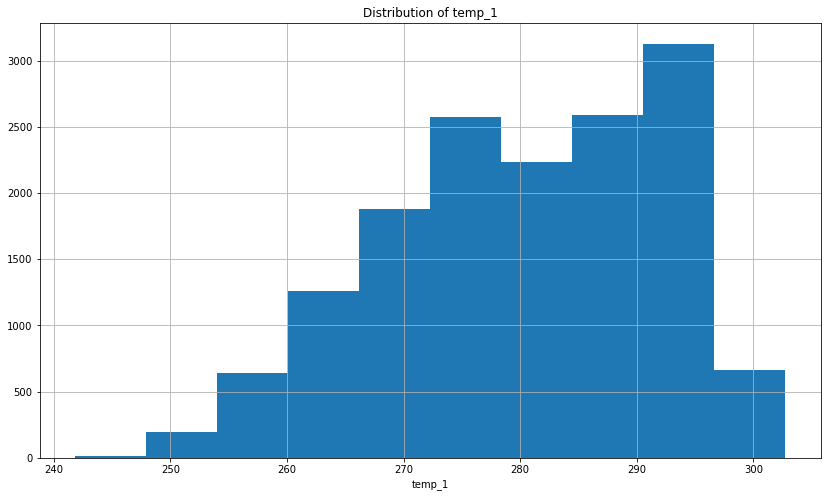

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.temp_1.hist()
plt.title('Distribution of temp_1')
plt.xlabel('temp_1')
plt.show()

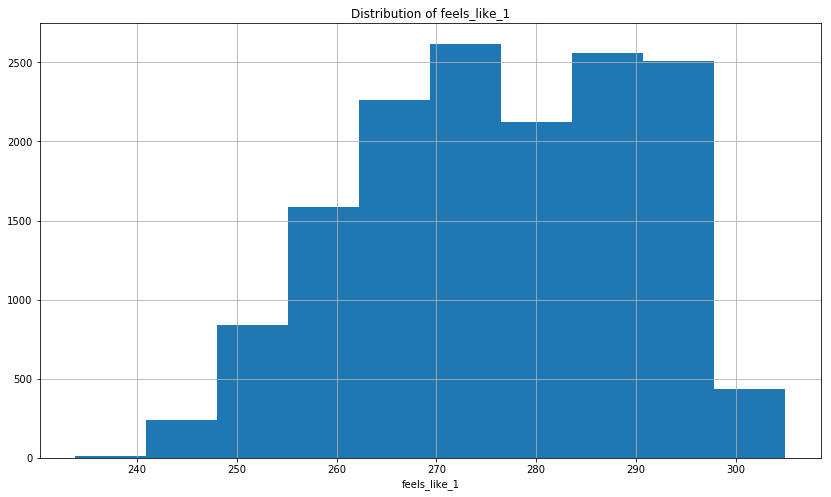

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.feels_like_1.hist()
plt.title('Distribution of feels_like_1')
plt.xlabel('feels_like_1')
plt.show()

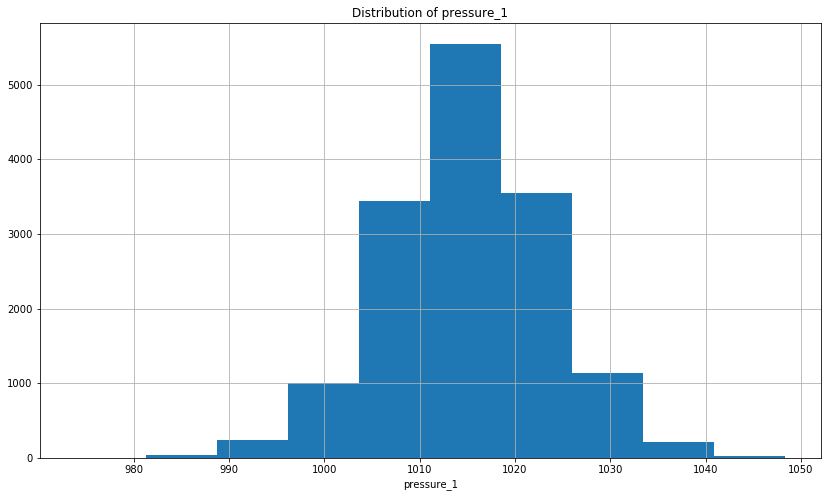

In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.pressure_1.hist()
plt.title('Distribution of pressure_1')
plt.xlabel('pressure_1')
plt.show()

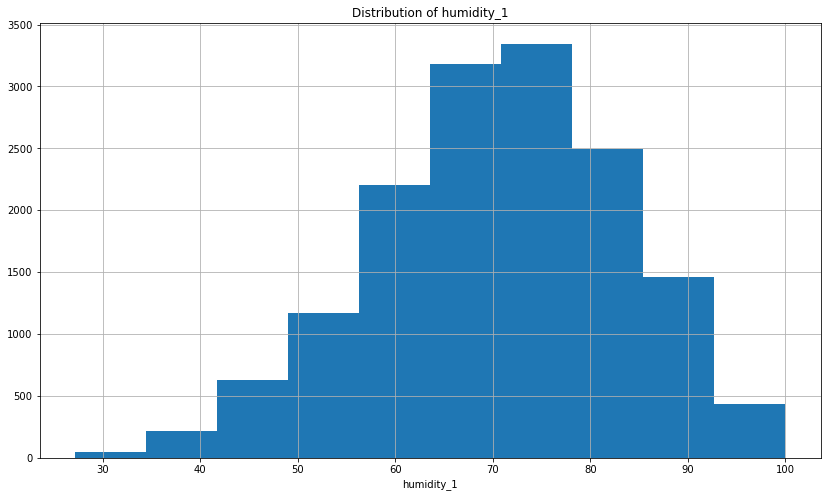

In [25]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.humidity_1.hist()
plt.title('Distribution of humidity_1')
plt.xlabel('humidity_1')
plt.show()

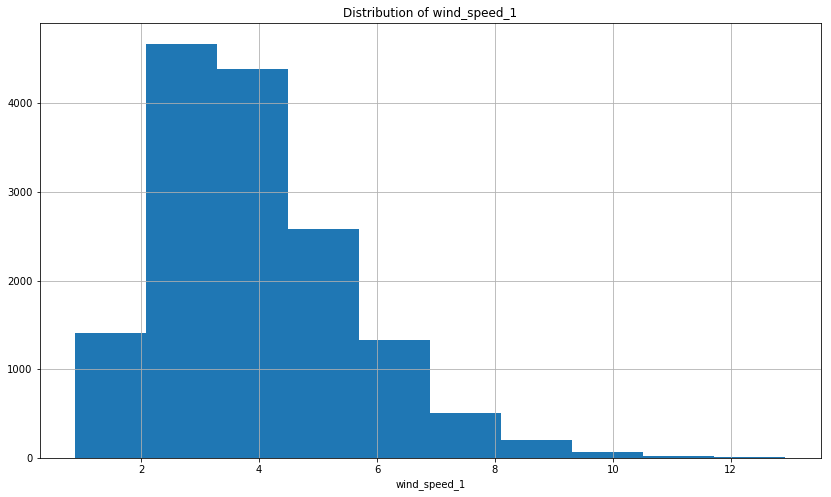

In [26]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.wind_speed_1.hist()
plt.title('Distribution of wind_speed_1')
plt.xlabel('wind_speed_1')
plt.show()

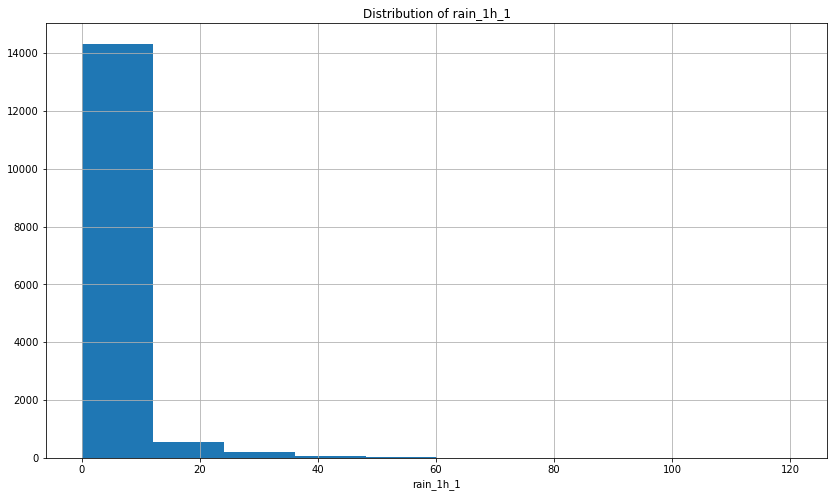

In [27]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.rain_1h_1.hist()
plt.title('Distribution of rain_1h_1')
plt.xlabel('rain_1h_1')
plt.show()

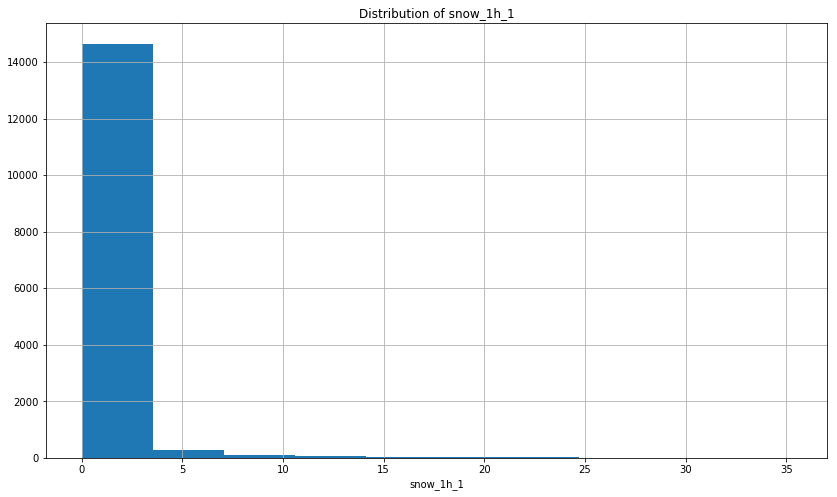

In [28]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.snow_1h_1.hist()
plt.title('Distribution of snow_1h_1')
plt.xlabel('snow_1h_1')
plt.show()

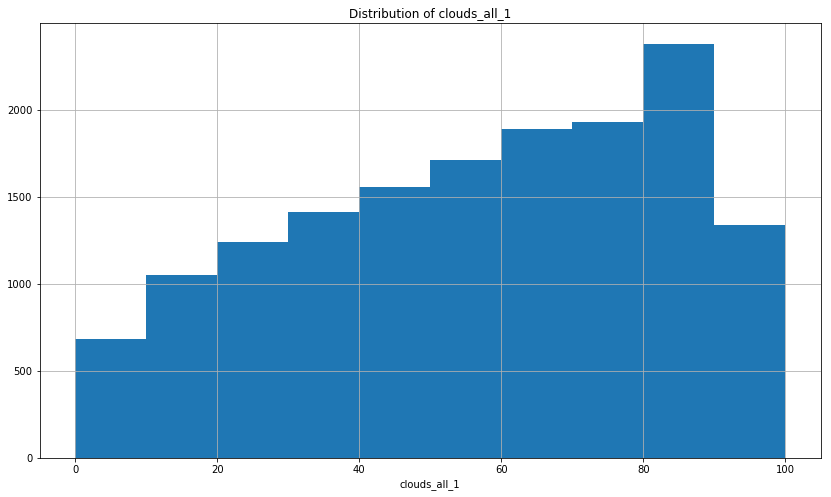

In [29]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df_lr_daily.clouds_all_1.hist()
plt.title('Distribution of clouds_all_1')
plt.xlabel('clouds_all_1')
plt.show()

We now check the correllations between the features. We only consider the features of 1 day prior, since features containing the same datas will certainly be correlated. 

In [30]:
df_lr_corr = df_lr_daily[['temp_1', 'feels_like_1', 'pressure_1', 'humidity_1', 'wind_speed_1', 'rain_1h_1', 
                   'snow_1h_1','clouds_all_1']].copy()
df_lr_corr = df_lr_corr.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_lr_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0:'Correlation Coefficient'}, inplace=True)
df_lr_corr.drop(df_lr_corr.iloc[1::2].index,inplace=True)
#Remove perfect correlation
df_lr_corr_nd = df_lr_corr.drop(df_lr_corr[(df_lr_corr['Correlation Coefficient']== 1.0)].index)
# Show high correlations
df_lr_corr_nd[(df_lr_corr_nd['Correlation Coefficient']>0.1)]

,Feature 1,Feature 2,Correlation Coefficient
8,feels_like_1,temp_1,0.994591
10,clouds_all_1,humidity_1,0.587006
12,clouds_all_1,pressure_1,0.406918
14,pressure_1,wind_speed_1,0.341271
16,rain_1h_1,humidity_1,0.341124
18,rain_1h_1,clouds_all_1,0.326341
20,pressure_1,humidity_1,0.298112
22,rain_1h_1,pressure_1,0.252280
24,feels_like_1,wind_speed_1,0.248110
26,temp_1,pressure_1,0.241403


We make a correlation heat map. 

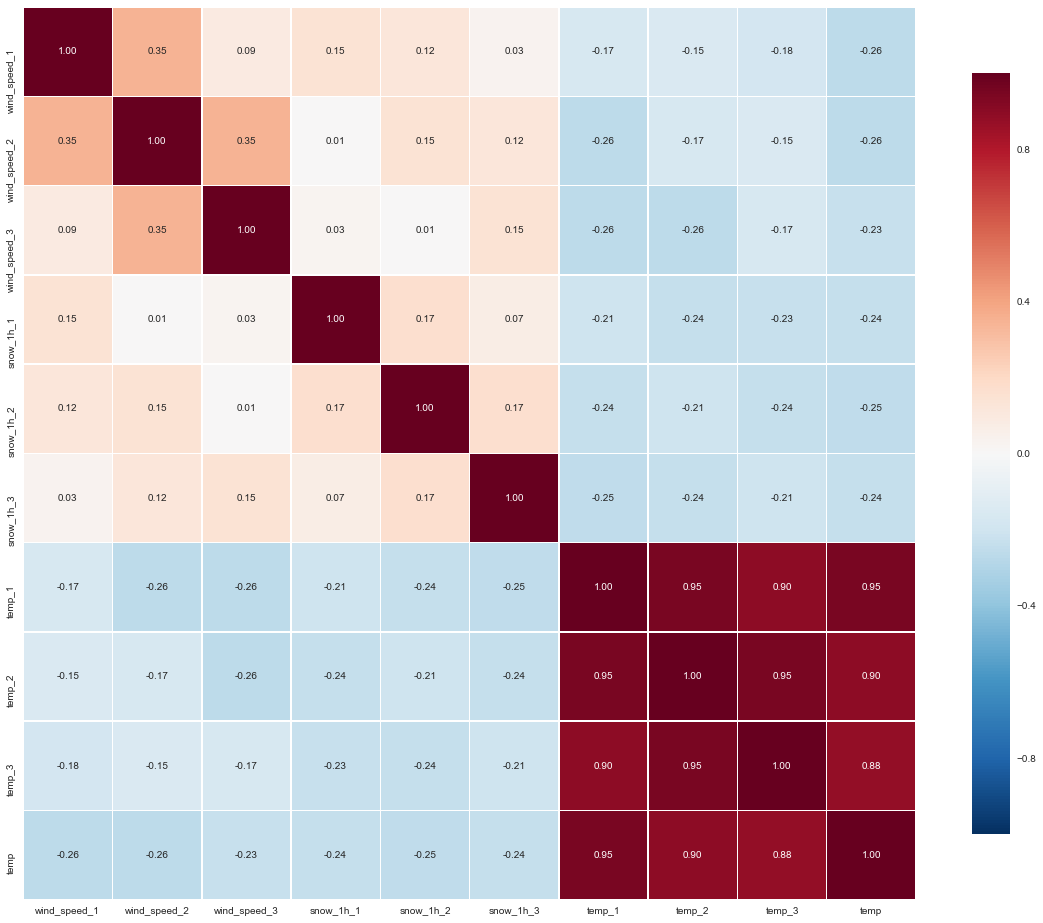

In [50]:
import seaborn as sns

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_lr_daily)

Unsurprinsingly, we see a high correlation between 'temp' and 'feels_like'. We thus remove 'feel_like', as it is not providing new information in our prediction model. 'Humidity' and 'clouds_all', as well as 'pressure' and 'clouds_all' are also fairly corrolated, with above 0.3 correlation coefficient. 

In [32]:
df_lr_daily = df_lr_daily.drop(columns = ['feels_like_1', 'feels_like_2', 'feels_like_3'])

We now look at the correlation between the different features and 'temp', the feature we want to predict. 

In [33]:
df_lr_corr_temp = df_lr_daily.corr().abs()[['temp']].sort_values('temp')
df_lr_corr_temp.head(35)

,temp
humidity_1,0.033926
pressure_2,0.041807
pressure_3,0.064024
rain_1h_2,0.089029
humidity_2,0.090916
rain_1h_3,0.095349
humidity_3,0.100244
pressure_1,0.101066
rain_1h_1,0.109030
clouds_all_1,0.145840


In our model, we only keep the features with the highest correlation, that is 'temp', 'wind_speed', 'snow_1h'.

In [34]:
df_lr_daily = df_lr_daily[['wind_speed_1', 'wind_speed_2',
              'wind_speed_3','snow_1h_1', 'snow_1h_2', 'snow_1h_3',
                'temp_1', 'temp_2', 'temp_3', 'temp']]
df_lr_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Freq: D
Data columns (total 10 columns):
wind_speed_1    15185 non-null float64
wind_speed_2    15185 non-null float64
wind_speed_3    15185 non-null float64
snow_1h_1       15185 non-null float64
snow_1h_2       15185 non-null float64
snow_1h_3       15185 non-null float64
temp_1          15185 non-null float64
temp_2          15185 non-null float64
temp_3          15185 non-null float64
temp            15185 non-null float64
dtypes: float64(10)
memory usage: 1.3 MB


We plot the different correlations into a scatter plot. 

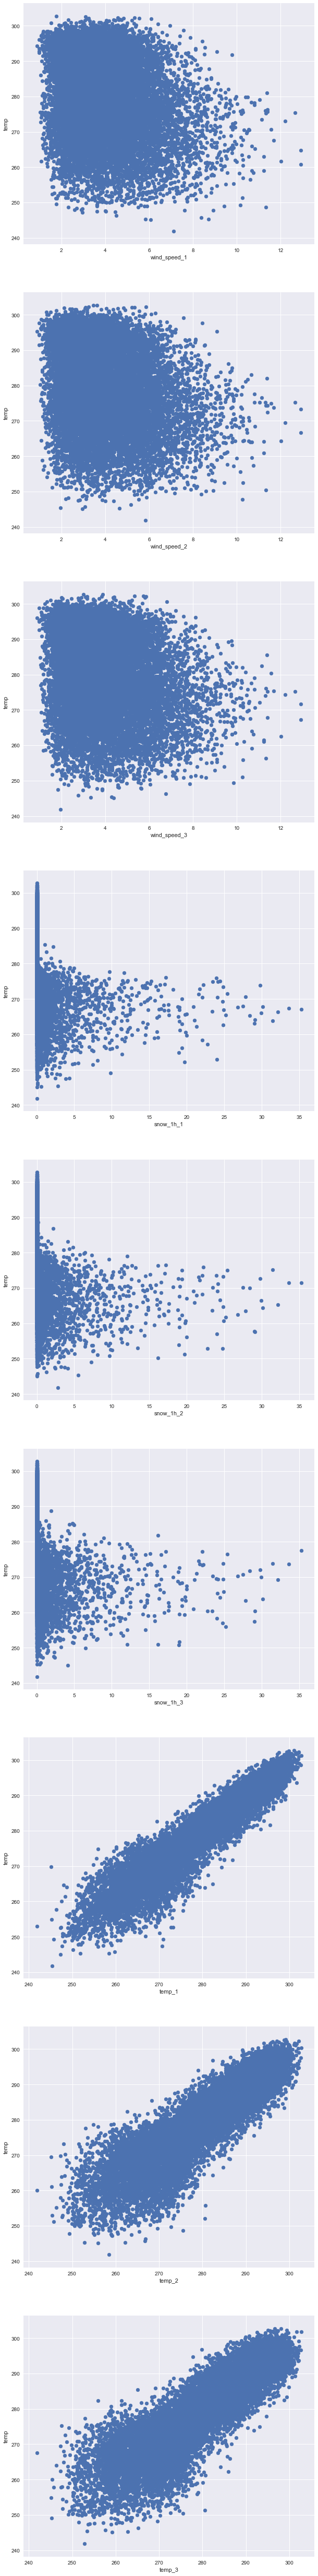

In [49]:
%matplotlib inline
features = ['wind_speed_1', 'wind_speed_2',
              'wind_speed_3','snow_1h_1', 'snow_1h_2', 'snow_1h_3',
                'temp_1', 'temp_2', 'temp_3']

plt.rcParams['figure.figsize'] = [10, 90]
fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True)
arr = np.array(features)

for i in range(len(arr)):
    axes[i].scatter(df_lr_daily[arr[i]], df_lr_daily['temp'])
    axes[i].set(xlabel=arr[i], ylabel='temp')

plt.show()

We are now ready to perform a linear regression model on our data set, which we save into a csv file. 

In [40]:
df_lr_daily.to_csv("weather_data_lin_reg.csv", header=True, index=True)